In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pickle

In [2]:
def labels(filename):
    data = np.matrix(pd.read_csv(filename).values)
    data_y = data[:, 0]
    data_y-=1 #binaryization of the categorical data
    return data_y

In [3]:
training_data_x = pickle.load(open("TS-Train.pkl", "rb")).dropna(axis=1)
test_x = pickle.load(open("TS-Test.pkl", "rb")).dropna(axis=1)

training_data_x = preprocessing.normalize(training_data_x,norm='max',axis=0) #without normalization acc=99%
test_x = preprocessing.normalize(test_x, norm='max',axis=0) #normalization "DOES NOT" affect decision trees BTW

training_data_y = labels("../archive/exoTrain.csv")
test_y = labels("../archive/exoTest.csv")

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


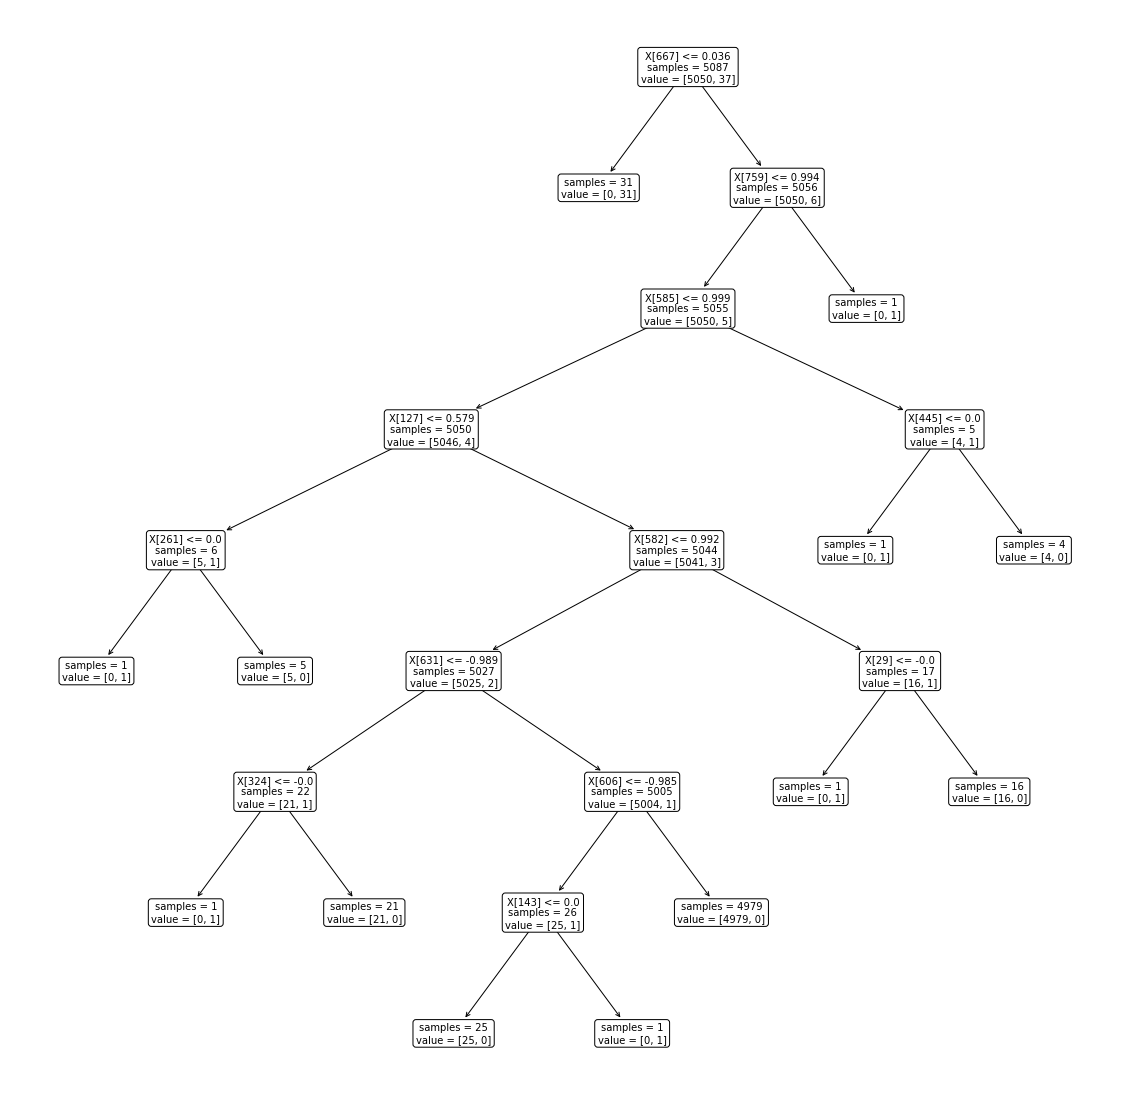

Accuracy percentage:  98.24561403508771 %


In [4]:
DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(training_data_x, training_data_y)

plt.figure(figsize=(20,20))
tree.plot_tree(DTclassifier, fontsize=10, impurity=False, rounded=True)
plt.show()

y_pred = DTclassifier.predict(test_x)
print("Accuracy percentage: ", accuracy_score(test_y, y_pred)*100, "%")

In [5]:
with open('tf-models/decision-tree.pkl','wb') as f:
    pickle.dump(DTclassifier,f)

In [6]:
RFclassifier = RandomForestClassifier()
RFclassifier.fit(training_data_x, training_data_y)
y_pred = RFclassifier.predict(test_x)
print("Accuracy percentage: ", accuracy_score(test_y, y_pred)*100, "%")

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy percentage:  99.12280701754386 %


In [7]:
with open('tf-models/random-forest.pkl','wb') as f:
    pickle.dump(RFclassifier,f)